# Importing Needed packages

In [2]:
import random
import numpy as np
import pandas as pd
import sklearn.metrics 
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.model_selection import train_test_split, ShuffleSplit 
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
print("Libraries imported.")

Libraries imported.


# Reading Data

Reading the data from CSV file using pandas:
To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

### `train_set.csv:`

- UAV_i_track: clockwise angle from north between the ith UAV
and its target (0, 2π):
- UAV_i_x, UAV_i_y: position components of the ith UAV in
meters
- UAV_i_vx, UAV_i_vy (dx, dy): speed components of the ith UAV
in meters/seconds
- UAV_i_target_x, UAV_i_target_y: position components of the
ith UAV target in meters

In [3]:
DB = pd.read_csv('train_set.csv')
dataset_name = "UAV_Conflict"
class_names = np.array(['num_collisions=0','num_collisions=1','num_collisions=2','num_collisions=3', 'num_collisions=4'])
X_all = np.asarray(DB[['UAV_1_track', 'UAV_1_x', 'UAV_1_y', 'UAV_1_vx', 'UAV_1_vy', 'UAV_1_target_x', 'UAV_1_target_y',
         'UAV_2_track', 'UAV_2_x', 'UAV_2_y', 'UAV_2_vx', 'UAV_2_vy', 'UAV_2_target_x', 'UAV_2_target_y',
         'UAV_3_track', 'UAV_3_x', 'UAV_3_y', 'UAV_3_vx', 'UAV_3_vy', 'UAV_3_target_x', 'UAV_3_target_y',
         'UAV_4_track', 'UAV_4_x', 'UAV_4_y', 'UAV_4_vx', 'UAV_4_vy', 'UAV_4_target_x', 'UAV_4_target_y',
         'UAV_5_track', 'UAV_5_x', 'UAV_5_y', 'UAV_5_vx', 'UAV_5_vy', 'UAV_5_target_x', 'UAV_5_target_y']])
y_all = np.asarray(DB['num_collisions'])
print('File loaded:'  )
print(DB.shape)
DB.head()

File loaded:
(1000, 37)


,UAV_1_track,UAV_1_x,UAV_1_y,UAV_1_vx,UAV_1_vy,UAV_1_target_x,UAV_1_target_y,UAV_2_track,UAV_2_x,UAV_2_y,...,UAV_4_target_y,UAV_5_track,UAV_5_x,UAV_5_y,UAV_5_vx,UAV_5_vy,UAV_5_target_x,UAV_5_target_y,num_collisions,min_CPA
0,0.027068,-62300.591721,-59305.682068,6.705684,247.671970,-59569.480482,41566.912694,1.474570,-56681.475086,-5314.787648,...,42576.874951,1.607547,-80967.561432,37684.582412,213.175442,-7.837820,41342.567045,33187.606489,3,1673.734894
1,4.023101,-17220.612570,47439.586909,-167.653031,-138.169553,-98139.258988,-19248.698541,2.614451,33573.808959,51374.559396,...,-35144.579226,4.315806,13285.311651,-41245.545752,-196.978758,-82.489078,-2806.112817,-47984.174724,0,51230.547792
2,1.841994,-19900.350438,59030.833595,208.716697,-58.033328,70435.277561,33913.163359,2.492568,-53314.291038,-15227.414024,...,-23468.668544,0.954796,21679.563309,-34471.154448,208.580726,147.651921,78980.509691,6091.533217,0,18668.177773
3,3.621532,-48565.126583,-11986.418570,-113.516305,-218.076997,-60503.694386,-34921.687695,4.941877,66081.722767,-13048.091807,...,42374.513704,4.056282,-31560.842269,36234.825255,-184.415246,-141.978597,-61666.394619,13057.001319,0,10159.624794
4,2.318417,52665.281329,-47498.516869,177.796999,-164.846698,63901.656021,-57916.461362,5.084740,-8541.183540,3543.309665,...,26128.828499,2.515598,18186.463747,79639.001255,133.007662,-183.966901,63306.445359,17232.196700,0,22110.623878


# Data Analysis

Let’s see how many of each class is in our data set

In [4]:
DB['num_collisions'].value_counts()

0    538
1    333
2     96
3     30
4      3
Name: num_collisions, dtype: int64

You can easily explore your data using visualization techniques:

array([[<AxesSubplot: title={'center': 'num_collisions'}>]], dtype=object)

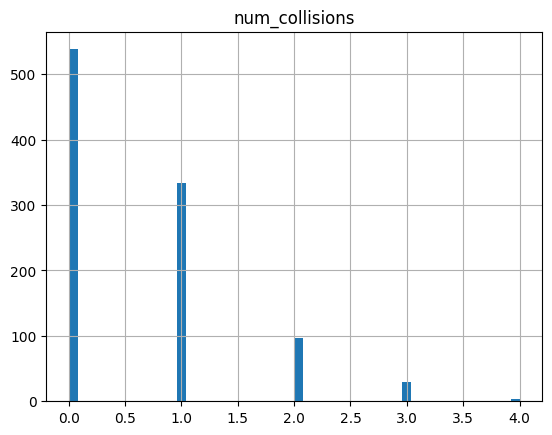

In [5]:
DB.hist(column='num_collisions', bins=50)

As you can see our dataset is unbalanced so we have to balance it.

# Balancing dataset

### Random over-sampling with imblearn:

One way to fight imbalance data is to generate new samples in the minority classes. The most naive strategy is to generate new samples by randomly sampling with replacement of the currently available samples. The RandomOverSampler offers such a scheme.

In [6]:
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_all, y_all)
# fit predictor and target variable

print('Original dataset shape', Counter(y_all))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 538, 1: 333, 2: 96, 3: 30, 4: 3})
Resample dataset shape Counter({3: 538, 0: 538, 1: 538, 2: 538, 4: 538})


We should normalize the data too:

# Normalizing the dataset:

Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:

In [7]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_ros)
X_ros = scaler.transform(X_ros.astype(float))

# Summary of the dataset

Print some information about the dataset.

Data structures

- Input X: array ( n x m )
- Output Y: array ( n x 1 )

In [8]:
print("Dataset: %s" %(dataset_name))
print("Input shape: %s" %str(X_ros.shape))
print("Output shape: %s" %str(y_ros.shape))
print("Number of attributes/features: %d" %(X_ros.shape[1]))
print("Number of classes: %d %s" %(len(class_names), str(class_names)))
print("Number of samples: %d" %(X_ros.shape[0]))

Dataset: UAV_Conflict
Input shape: (2690, 35)
Output shape: (2690,)
Number of attributes/features: 35
Number of classes: 5 ['num_collisions=0' 'num_collisions=1' 'num_collisions=2'
 'num_collisions=3' 'num_collisions=4']
Number of samples: 2690


# Train/Test dataset

We split our dataset into train and test set:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.333, 
                                                    random_state=117)

print("Size of training set: %d" %X_train.shape[0])
print("Size of test set: %d" %X_test.shape[0])

print('First training sample')
id = 0
print("    x_train_%d = %r" %(id,X_train[id]))
print("    y_train_%d = %r ['%s']" %(id,y_train[id],class_names[y_train[id]]))

print('First test sample')
id = 0
print("    x_test_%d = %r" %(id,X_test[id]))
print("    y_test_%d = %r ['%s']" %(id,y_test[id],class_names[y_test[id]]))

Size of training set: 1794
Size of test set: 896
First training sample
    x_train_0 = array([-0.36308684, -1.10234018,  1.14421957,  0.69412201, -1.03177579,
        0.8512236 , -1.43548964,  0.34439227,  0.29358284, -0.08834921,
       -0.56277083, -1.20110554, -0.5189308 , -1.60464294,  0.77769774,
        1.10570247,  0.07904294, -1.22368917, -0.03299995, -1.2163406 ,
       -0.10589764, -0.55479167, -1.13258878, -0.32138638,  1.17873374,
       -0.82241   ,  0.87201784, -1.40628444,  1.16211084,  0.52529542,
       -1.48046366, -0.87724019,  0.87084082, -1.1468489 ,  0.09464698])
    y_train_0 = 4 ['num_collisions=4']
First test sample
    x_test_0 = array([-0.74916023, -0.84039734,  0.63652728,  1.31035822, -0.31322971,
        0.90709184,  0.20821739, -1.38412649, -0.24390531, -1.8792323 ,
        0.52803445,  1.36792257,  0.76941069,  0.97813471, -0.11524155,
        0.1733333 ,  1.01148226,  0.22404143, -1.19270785,  0.53778355,
       -1.34019383, -1.41590178,  0.00875108, -0

# Modeling 

## Support Vector Machines

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

- Linear
- Polynomial
- Radial basis function (RBF)
- Sigmoid

Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset. We usually choose different functions in turn and compare the results. Let's use different kenrnels and compare the results.

In [14]:
model = svm.SVC(class_weight='balanced', kernel='poly', degree=6)
model.fit(X_train, y_train) 
print('Accuracy of SVM classifier on training set with 6 degree Polynomial kernel: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set with 6 degree Polynomial kernel: {:.2f}'
     .format(model.score(X_test, y_test)))

Accuracy of SVM classifier on training set with 6 degree Polynomial kernel: 1.00
Accuracy of SVM classifier on test set with 6 degree Polynomial kernel: 0.86


## K nearest neighbor (KNN)

Classifier implementing the k-nearest neighbors vote.

In [21]:
k = 9
#Train Model and Predict  
model = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
model
y_pred=model.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  0.7435897435897436
Test set Accuracy:  0.6595982142857143


In [19]:
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    model = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred=model.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)

    
    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])

print(mean_acc)

[0.81808036 0.77232143 0.72767857 0.6953125  0.6875     0.67857143
 0.671875   0.6640625  0.65959821]


Plot the model accuracy for a different number of neighbors.

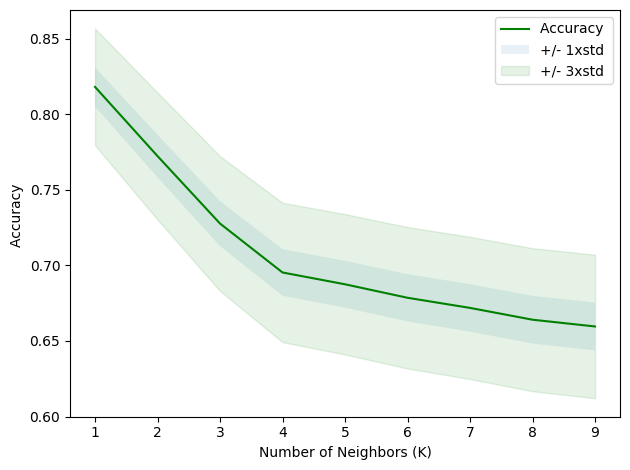

In [20]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [138]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8180803571428571 with k= 1


Now we can predict using our test set:

# Predict on test set

In [16]:
y_pred = model.predict(X_test)

# Evaluation

Evaluation of a specific solution on the test set, comparing predicted values 'y_pred' with test values 'y_test'.

## Accuracy

In [184]:
acc = model.score(X_test, y_test)    
print("Accuracy %.3f" %acc)

Accuracy 0.863


## Precision & Recall

Classification report contains more accurate performance information.

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.90      0.72       176
           1       0.86      0.54      0.67       184
           2       0.98      0.88      0.93       187
           3       1.00      1.00      1.00       182
           4       1.00      1.00      1.00       167

    accuracy                           0.86       896
   macro avg       0.89      0.87      0.86       896
weighted avg       0.89      0.86      0.86       896



Based on the count of each section, we can calculate precision and recall of each label:

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

Finally, we can tell the average accuracy for this classifier is the average of the F1-score for the 5 labels, which is 0.82 in KNN case and 0.86 in SVM case.

## Confusion Matrix

A way looking at the accuracy of the classifier is to look at confusion matrix.

In [186]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print('Confusion Matrix:\n')
print(confusion_matrix(y_test, y_pred, labels=[4,3,2,1,0]))

Confusion Matrix:

[[167   0   0   0   0]
 [  0 182   0   0   0]
 [  0   0 165   1  21]
 [  0   0   1 100  83]
 [  0   0   2  15 159]]


Confusion matrix, without normalization
[[167   0   0   0   0]
 [  0 182   0   0   0]
 [  0   0 165   1  21]
 [  0   0   1 100  83]
 [  0   0   2  15 159]]


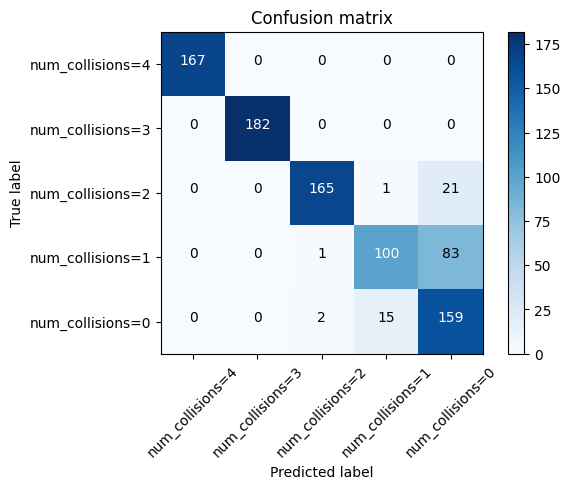

In [187]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[4,3,2,1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['num_collisions=4','num_collisions=3','num_collisions=2','num_collisions=1', 'num_collisions=0'],normalize= False,  title='Confusion matrix')